**Wumpus world problem**(Mini project-04)

**Q-Algorithm**

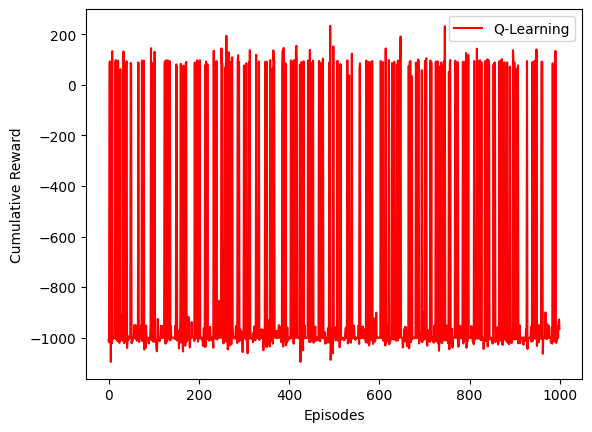

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
import imageio
import os

epsilon = 1.0  # Definition of environment parameters
grid_size = 4
actions = ['up', 'down', 'left', 'right', 'shoot_up', 'shoot_down', 'shoot_left', 'shoot_right']
q_table = np.zeros((grid_size, grid_size, len(actions)))

# Initial Agent Location, Pits, Wumpus and Gold
agent_position = [0, 0]
wumpus_position = [3, 3]
gold_position = [1, 2]
pits = [[2, 2], [2, 3]]

# Function to move Wumpus
def move_wumpus():
    move = random.choice(['up', 'down', 'left', 'right'])
    if move == 'up' and wumpus_position[1] < grid_size - 1:
        wumpus_position[1] += 1
    elif move == 'down' and wumpus_position[1] > 0:
        wumpus_position[1] -= 1
    elif move == 'left' and wumpus_position[0] > 0:
        wumpus_position[0] -= 1
    elif move == 'right' and wumpus_position[0] < grid_size - 1:
        wumpus_position[0] += 1

# Function to get new status
def get_next_state(state, action):
    x, y = state
    if action == 'up' and y < grid_size - 1:
        y += 1
    elif action == 'down' and y > 0:
        y -= 1
    elif action == 'left' and x > 0:
        x -= 1
    elif action == 'right' and x < grid_size - 1:
        x += 1
    return [x, y]

# Function to get reward
def get_reward(state, action):
    if state == gold_position:
        return 100  # Rewards for finding gold
    if state in pits or state == wumpus_position:
        return -1000  # Penalty for falling into a pit or being eaten by Wumpus
    if (action == 'shoot_up' and wumpus_position == [state[0], state[1] + 1]) or \
       (action == 'shoot_down' and wumpus_position == [state[0], state[1] - 1]) or \
       (action == 'shoot_left' and wumpus_position == [state[0] - 1, state[1]]) or \
       (action == 'shoot_right' and wumpus_position == [state[0] + 1, state[1]]):
        return 50  # Bonus for killing Wumpus
    return -1  # Penalty for each move

# Q-Learning algorithm settings
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
#epsilon = 0.051  # Discovery rate
#epsilon = 1.0  # Initial exploration rate
min_epsilon = 0.01  # Minimum exploration rate
epsilon_decay = 0.995  # Exploration rate decay factor
episodes = 1000

# Function to draw the environment and save it as an image
# def render(state, action, episode, step):
#     grid = np.zeros((grid_size, grid_size, 3), dtype=np.uint8)
#     grid[state[0], state[1]] = [255, 255, 255]  # Show the agent as white
#     grid[gold_position[0], gold_position[1]] = [255, 215, 0]  # Make gold look like gold
#     grid[wumpus_position[0], wumpus_position[1]] = [255, 0, 0]  # Show Wumpus red
#     for pit in pits:
#         grid[pit[0], pit[1]] = [0, 0, 0]  # Show pits black
#     plt.imshow(grid)
#     plt.title(f'Episode: {episode}, Step: {step}, Action: {action}')
#     plt.axis('off')
#     plt.savefig(f'frames/frame_{episode}_{step}.png')
#     plt.close()

# Agent training
def train_q_learning(episodes):
    rewards = []
    frames = []  #
    for episode in range(episodes):
        state = [0, 0]
        total_reward = 0
        for step in range(100):  #
# Exploration rate decay
            # if epsilon > min_epsilon:
            #     epsilon *= epsilon_decay
            if np.random.rand() < epsilon:
                action = random.choice(actions)
            else:
                action = actions[np.argmax(q_table[state[0], state[1]])]
            next_state = get_next_state(state, action) if not action.startswith('shoot') else state
            reward = get_reward(next_state, action)
            total_reward += reward
            q_table[state[0], state[1], actions.index(action)] = (1 - alpha) * q_table[state[0], state[1], actions.index(action)] + alpha * (reward + gamma * np.max(q_table[next_state[0], next_state[1]]))
            state = next_state
            move_wumpus()
            # frame_filename = f'frames/frame_{episode}_{step}.png'
            # frames.append(frame_filename)
            # render(state, action, episode, step)
            if reward == 100 or reward == -1000:
                break


        rewards.append(total_reward)
    # GIF creation for all episodes
    # with imageio.get_writer('wumpus_world_training.gif', mode='I') as writer:
    #     for filename in frames:
    #         image = imageio.imread(filename)
    #         writer.append_data(image)
    # #
    # for filename in frames:
    #     os.remove(filename)
    return rewards

# Q-Learning training and diagramming of rewards
# os.makedirs('frames', exist_ok=True)
q_rewards = train_q_learning(episodes)

# Show rewards chart
plt.plot(q_rewards,'r', label='Q-Learning')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.show()

**DeePQN Algorithm**

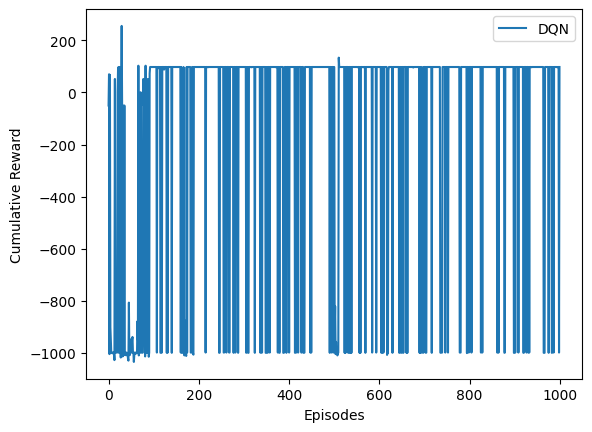

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import imageio
import os
from collections import deque
from sklearn.neural_network import MLPRegressor

# Definition of environment parameters
grid_size = 4
actions = ['up', 'down', 'left', 'right', 'shoot_up', 'shoot_down', 'shoot_left', 'shoot_right']

# Initial Agent Location, Pits, Wumpus and Gold
agent_position = [0, 0]
wumpus_position = [3, 3]
gold_position = [1, 2]
pits = [[2, 2], [2, 3]]

# Function to move Wumpus
def move_wumpus():
    move = random.choice(['up', 'down', 'left', 'right'])
    if move == 'up' and wumpus_position[1] < grid_size - 1:
        wumpus_position[1] += 1
    elif move == 'down' and wumpus_position[1] > 0:
        wumpus_position[1] -= 1
    elif move == 'left' and wumpus_position[0] > 0:
        wumpus_position[0] -= 1
    elif move == 'right' and wumpus_position[0] < grid_size - 1:
        wumpus_position[0] += 1

# Function to get new status
def get_next_state(state, action):
    x, y = state
    if action == 'up' and y < grid_size - 1:
        y += 1
    elif action == 'down' and y > 0:
        y -= 1
    elif action == 'left' and x > 0:
        x -= 1
    elif action == 'right' and x < grid_size - 1:
        x += 1
    return [x, y]

# Function to get reward
def get_reward(state, action):
    if state == gold_position:
        return 100  # Rewards for finding gold
    if state in pits or state == wumpus_position:
        return -1000  # Penalty for falling into a pit or being eaten by Wumpus
    if (action == 'shoot_up' and wumpus_position == [state[0], state[1] + 1]) or \
       (action == 'shoot_down' and wumpus_position == [state[0], state[1] - 1]) or \
       (action == 'shoot_left' and wumpus_position == [state[0] - 1, state[1]]) or \
       (action == 'shoot_right' and wumpus_position == [state[0] + 1, state[1]]):
        return 50  # Bonus for killing Wumpus
    return -1  # Penalty for each move

# # Function to draw the environment and save it as an image
# def render(state, action, episode, step):
#     grid = np.zeros((grid_size, grid_size, 3), dtype=np.uint8)
#     grid[state[0], state[1]] = [255, 255, 255]  # Show the agent as white
#     grid[gold_position[0], gold_position[1]] = [255, 215, 0]  # Make gold look like gold
#     grid[wumpus_position[0], wumpus_position[1]] = [255, 0, 0]  # Show Wumpus red
#     for pit in pits:
#         grid[pit[0], pit[1]] = [0, 0, 0]  # Show pits black
#     plt.imshow(grid)
#     plt.title(f'Episode: {episode}, Step: {step}, Action: {action}')
#     plt.axis('off')
#     plt.savefig(f'frames/frame_{episode}_{step}.png')
#     plt.close()

# Definition of the DQNAgent class
class DQNAgent:
    def __init__(self):
        self.model = MLPRegressor(hidden_layer_sizes=(70, 30),activation='tanh', solver='adam' ,learning_rate_init=0.001, max_iter=400, warm_start=True)
        self.model.partial_fit([np.zeros(2)], [np.zeros(len(actions))])  # Initialize the model with zero weights
        self.memory = deque(maxlen=2000)
        self.gamma = 0.9  #
        self.epsilon = 0.1  #
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.01

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.choice(actions)
        act_values = self.model.predict([state])
        return actions[np.argmax(act_values[0])]

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma * np.amax(self.model.predict([next_state])[0]))
            target_f = self.model.predict([state])
            target_f[0][actions.index(action)] = target
            self.model.partial_fit([state], target_f)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def train(self, episodes, batch_size):
        rewards = []
        frames = []
        for e in range(episodes):
            state = [0, 0]
            total_reward = 0
            for step in range(50):
                action = self.act(state)
                next_state = get_next_state(state, action) if not action.startswith('shoot') else state
                reward = get_reward(next_state, action)
                total_reward += reward
                self.remember(state, action, reward, next_state, reward == 100 or reward == -1000)
                state = next_state
                move_wumpus()
                # frame_filename = f'frames/frame_{e}_{step}.png'
                # frames.append(frame_filename)
                # render(state, action, e, step)
                if reward == 100 or reward == -1000:
                    break
                if len(self.memory) > batch_size:
                    self.replay(batch_size)
            rewards.append(total_reward)
        # # GIF creation for all episodes
        # with imageio.get_writer('wumpus_world_training_dqn.gif', mode='I') as writer:
        #     for filename in frames:
        #         image = imageio.imread(filename)
        #         writer.append_data(image)
        #
        # for filename in frames:
        #     os.remove(filename)
        return rewards

# DQN algorithm settings and agent training
episodes = 1000
batch_size = 32
os.makedirs('frames', exist_ok=True)

agent = DQNAgent()
dqn_rewards = agent.train(episodes, batch_size)

# Show rewards chart
plt.plot(dqn_rewards, label='DQN')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.show()


In [ ]:
q_avg_reward = np.mean(q_rewards)
dqn_avg_reward = np.mean(dqn_rewards)

print(f"Average reward for Q-Learning: {q_avg_reward}")
print(f"Average reward for DQN: {dqn_avg_reward}")


Average reward for Q-Learning: -163.728
Average reward for DQN: -142.73


**Q-Learning with adaptive epsilon**

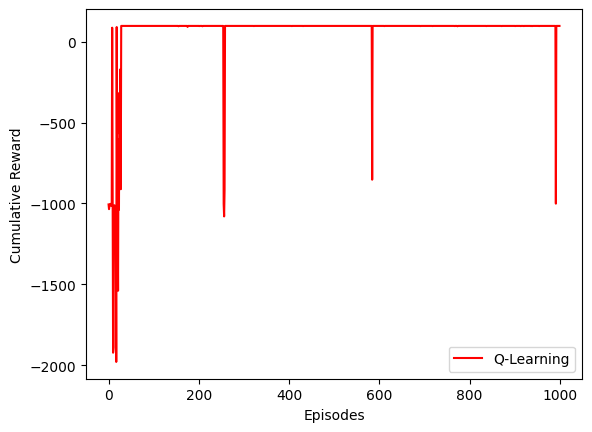

In [6]:
# Define constants and parameters
grid_size = 4
actions = ['up', 'down', 'left', 'right', 'shoot_up', 'shoot_down', 'shoot_left', 'shoot_right']
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 1.0  # Initial exploration rate
min_epsilon = 0.01  # Minimum exploration rate
epsilon_decay = 0.995  # Exploration rate decay factor

# Initial positions and states
initial_state = (0, 0)
gold_position = (2, 2)  # Example gold position
pit_positions = [(1, 1), (3, 0)]  # Example pit positions
wumpus_position = (3, 3)  # Example Wumpus position
wumpus_alive = True

# Create Q matrix
Q = np.zeros((grid_size, grid_size, len(actions)))

# Function to get next state based on action
def get_next_state(state, action):
    x, y = state
    if action == 'up' and y < grid_size - 1:
        y += 1
    elif action == 'down' and y > 0:
        y -= 1
    elif action == 'left' and x > 0:
        x -= 1
    elif action == 'right' and x < grid_size - 1:
        x += 1
    return (x, y)

# Function to get reward based on next state
def get_reward(state, wumpus_alive):
    if state == gold_position:
        return 100
    elif state in pit_positions:
        return -1000
    elif state == wumpus_position and wumpus_alive:
        return -1000
    else:
        return -1

# Function to choose action based on epsilon-greedy strategy
def choose_action(state):
    global epsilon
    if np.random.rand() < epsilon:
        return np.random.choice(actions)
    else:
        return actions[np.argmax(Q[state[0], state[1]])]

# Function to update Q values
def update_q(state, action, reward, next_state):
    action_index = actions.index(action)
    best_next_action = np.argmax(Q[next_state[0], next_state[1]])
    td_target = reward + gamma * Q[next_state[0], next_state[1], best_next_action]
    Q[state[0], state[1], action_index] += alpha * (td_target - Q[state[0], state[1], action_index])

# Function to simulate Wumpus movement
def move_wumpus(wumpus_position):
    possible_moves = ['up', 'down', 'left', 'right']
    move = random.choice(possible_moves)
    new_position = get_next_state(wumpus_position, move)
    return new_position

# Function to train the agent
def train_agent(episodes):
    global wumpus_alive, wumpus_position, epsilon
    rewards = []
    for _ in range(episodes):
        state = initial_state
        total_reward = 0
        wumpus_alive = True
        wumpus_position = (3, 3)  # Reset Wumpus position
        while True:
            action = choose_action(state)
            next_state = get_next_state(state, action)
            reward = get_reward(next_state, wumpus_alive)

            if 'shoot' in action:
                if next_state == wumpus_position:
                    wumpus_alive = False
                    reward += 50

            update_q(state, action, reward, next_state)
            state = next_state
            total_reward += reward
            if reward == 100 or reward == -1000:
                break

            # Exploration rate decay
            epsilon = max(min_epsilon, epsilon * epsilon_decay)

            # Move the Wumpus
            wumpus_position = move_wumpus(wumpus_position)

        rewards.append(total_reward)
    return rewards

# Training the Q-learning agent
q_rewards2 = train_agent(1000)
# Show rewards chart
plt.plot(q_rewards2,'r', label='Q-Learning')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.show()

**DeepQ-Learning with adaptive epsilon**

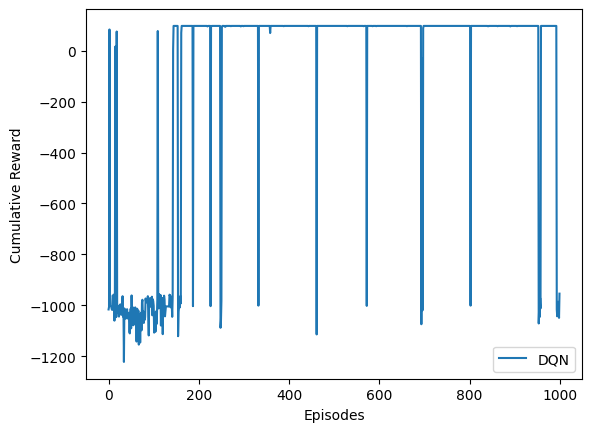

In [33]:
import numpy as np
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Define constants and parameters
grid_size = 4
actions = ['up', 'down', 'left', 'right', 'shoot_up', 'shoot_down', 'shoot_left', 'shoot_right']
action_space = len(actions)
state_space = grid_size * grid_size
alpha = 0.01  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 1.0  # Initial exploration rate
min_epsilon = 0.01  # Minimum exploration rate
epsilon_decay = 0.995  # Exploration rate decay factor
batch_size = 2  # Batch size for training

# Define neural network model
class DQN(nn.Module):
    def __init__(self, state_space, action_space):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_space, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, action_space)

    def forward(self, x):
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the DQN model, loss function, and optimizer
model = DQN(state_space, action_space)
optimizer = optim.Adam(model.parameters(), lr=alpha)
criterion = nn.MSELoss()

# Function to get next state based on action
def get_next_state(state, action):
    x, y = state
    if action == 'up' and y < grid_size - 1:
        y += 1
    elif action == 'down' and y > 0:
        y -= 1
    elif action == 'left' and x > 0:
        x -= 1
    elif action == 'right' and x < grid_size - 1:
        x += 1
    return (x, y)

# Function to get reward based on next state
def get_reward(state, wumpus_alive):
    if state == gold_position:
        return 100
    elif state in pit_positions:
        return -1000
    elif state == wumpus_position and wumpus_alive:
        return -1000
    else:
        return -1

# Function to choose action based on epsilon-greedy strategy
def choose_action(state):
    global epsilon
    if np.random.rand() < epsilon:
        return np.random.choice(actions)
    else:
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        q_values = model(state_tensor)
        return actions[torch.argmax(q_values).item()]

# Function to update model using experience replay
def update_model(memory):
    if len(memory) < batch_size:
        return

    batch = random.sample(memory, batch_size)
    state_batch, action_batch, reward_batch, next_state_batch, done_batch = zip(*batch)

    state_batch = torch.tensor(state_batch, dtype=torch.float32)
    action_batch = torch.tensor([actions.index(action) for action in action_batch], dtype=torch.int64)
    reward_batch = torch.tensor(reward_batch, dtype=torch.float32)
    next_state_batch = torch.tensor(next_state_batch, dtype=torch.float32)
    done_batch = torch.tensor(done_batch, dtype=torch.float32)

    q_values = model(state_batch).gather(1, action_batch.unsqueeze(1)).squeeze(1)
    next_q_values = model(next_state_batch).max(1)[0]
    target_q_values = reward_batch + gamma * next_q_values * (1 - done_batch)

    loss = criterion(q_values, target_q_values.detach())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Function to simulate Wumpus movement
def move_wumpus(wumpus_position):
    possible_moves = ['up', 'down', 'left', 'right']
    move = random.choice(possible_moves)
    new_position = get_next_state(wumpus_position, move)
    return new_position

# Training the Deep Q-learning agent
def train_agent(episodes):
    global epsilon, wumpus_alive, wumpus_position
    memory = []
    rewards = []

    for episode in range(episodes):
        state = initial_state
        total_reward = 0
        wumpus_alive = True
        wumpus_position = (3, 3)  # Reset Wumpus position

        while True:
            state_flattened = state[0] * grid_size + state[1]
            state_one_hot = np.zeros(state_space)
            state_one_hot[state_flattened] = 1
            action = choose_action(state_one_hot)
            next_state = get_next_state(state, action)
            reward = get_reward(next_state, wumpus_alive)
            done = reward == 100 or reward == -1000

            if 'shoot' in action:
                if next_state == wumpus_position:
                    wumpus_alive = False
                    reward += 50

            next_state_flattened = next_state[0] * grid_size + next_state[1]
            next_state_one_hot = np.zeros(state_space)
            next_state_one_hot[next_state_flattened] = 1
            memory.append((state_one_hot, action, reward, next_state_one_hot, done))
            state = next_state
            total_reward += reward

            update_model(memory)

            if done:
                break

            epsilon = max(min_epsilon, epsilon * epsilon_decay)
            wumpus_position = move_wumpus(wumpus_position)

        rewards.append(total_reward)

    return rewards

# Training the DQN agent
dqn_rewards2 = train_agent(1000)
# Show rewards chart
plt.plot(dqn_rewards2, label='DQN')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.show()


In [35]:
q_avg_reward2 = np.mean(q_rewards2)
dqn_avg_reward2 = np.mean(dqn_rewards2)

print(f"Average reward for Q-Learning: {q_avg_reward2}")
print(f"Average reward for DQN: {dqn_avg_reward2}")

Average reward for Q-Learning: 61.852
Average reward for DQN: -93.429
